
# Step 1: Load and Explore the Dataset

Objective:
The primary goal at this stage is to load the Premier League results dataset, covering the seasons from 2006-2007 to 2017-2018, into a Pandas DataFrame.

Loading the Data:
We start by importing the Pandas library. Using Pandas, we load our dataset from a CSV file into a DataFrame. This DataFrame df will be our main data structure for carrying out the analysis.

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../Group_project/results_final.csv')


Initial Data Exploration:
Once the data is loaded, it's crucial to get an overview of its structure and the types of variables it contains. This is achieved by displaying the first few rows and generating descriptive statistics for the numerical variables.

Understanding Dataset Structure: 
By examining the first few rows, we can identify the columns present in the dataset and get a sense of the type of data each column holds.

Statistical Summary: 
We then generate a statistical summary for the numerical variables. This summary includes measures such as mean, standard deviation, minimum, and maximum values, providing insights into the distribution of each numerical variable.

In [4]:
# Display the first few rows to understand the structure of the dataset
print(df.head())

# Get a statistical summary of the variables
print(df.describe())

      season              team  wins  losses  goals  total_yel_card  \
0  2006-2007        Arsenal FC    19       8     63              59   
1  2006-2007       Aston Villa    11      10     43              48   
2  2006-2007  Blackburn Rovers    15      16     52              77   
3  2006-2007  Bolton Wanderers    16      14     47              84   
4  2006-2007        Chelsea FC    24       3     64              62   

   total_red_card  total_scoring_att  ontarget_scoring_att  hit_woodwork  ...  \
0               3                638                   226            19  ...   
1               1                470                   154             9  ...   
2               6                478                   155             5  ...   
3               4                404                   120             7  ...   
4               4                636                   216            14  ...   

   penalty_save  total_high_claim  punches  points  Expenditure  Arrivals  \
0        

Preparing Data for Analysis:
To facilitate easier analysis and manipulation down the line, we sort the dataset based on the 'team' and 'season' columns. This ordering will make it more convenient to track a team's performance across different seasons.

In [5]:
df_sorted = df.sort_values(by=['team', 'season'])


# Step 2: Perform Linear Regression Analysis

Objective:

- This step is focused on leveraging linear regression to predict the 'fs_result' based on the previous year predictors within the Premier League dataset. The objective is to understand the influence of different factors on match outcomes and quantify their impact through model coefficients.

# Setup and Data Preparation:

Load the Dataset: 
- Begin by importing necessary libraries and loading the dataset into a Pandas DataFrame.

Identify Predictor Variables: 
- All columns except 'season', 'team', and 'fs_result' are considered predictors. This selection excludes identifiers and the target variable to ensure the model is trained on relevant features.

Linear Regression Function:
- A custom function, perform_linear_regression, encapsulates the process of fitting a linear regression model. 

This function:
- Splits the dataset into training and test sets for validation purposes.
- Initializes and trains a Linear Regression model using sklearn.
- Makes predictions on the test set and evaluates the model's performance.
- Visualizes the relationship between actual and predicted values to assess the model's accuracy.

Model Evaluation and Visualization:
- Model Coefficients: Displaying the model coefficients provides insight into the importance and influence of each predictor variable.
- Performance Metrics: Mean squared error (MSE), coefficient of determination (R²), and mean absolute error (MAE) are calculated to evaluate model performance. These metrics help in assessing the accuracy and goodness of fit of the model.
- Actual vs. Predicted Plot: A scatter plot of actual vs. predicted values, along with a line of perfect prediction, visually represents the model's predictive accuracy.

Coefficients: [-1.33154185e+07  6.65770771e+06 -4.04718194e+00  2.31287554e-02
  8.77326668e-01 -2.23400279e-02  1.29516653e-01 -3.87689483e-01
  1.86495355e-01  4.95897593e-01 -3.53617548e-01  4.31136114e+00
  4.80764342e+00  1.24485458e-01  2.03522347e-02  3.12745563e-01
 -6.08462010e-01 -1.14475958e-02 -6.35962439e-04 -1.18932105e-02
  2.13982723e-01  5.20927841e-03 -3.54124485e-01  1.61219523e+00
 -1.50366594e+00  2.20645276e-03  6.17958980e-04 -3.63602641e-04
  7.96989568e-02 -1.08626635e-03 -6.15470228e-01 -2.34507028e+00
 -1.40285336e-02  1.30586106e-01  6.65770850e+06  4.41958196e-04
  4.24260187e-01 -4.41923272e-04 -2.28385714e-01  4.41920478e-04]
Mean squared error: 121.23177597393502
Coefficient of determination (R^2): 0.5373253188420686
Mean absolute error:  9.420512898666102


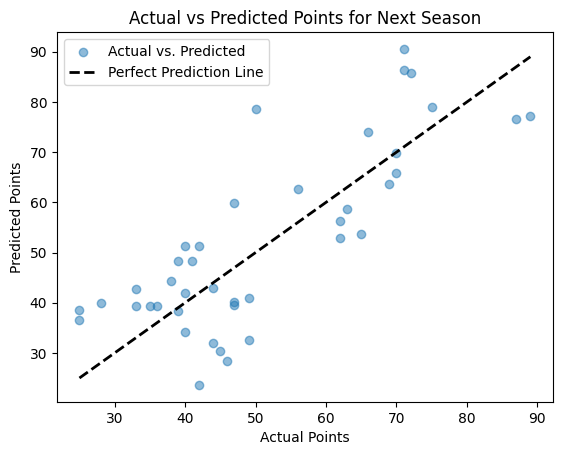

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('../Group_project/results_final.csv')

# Identify all predictor columns, exclude 'season', 'team', and 'next_season_points'
predictor_vars = [col for col in df.columns if col not in ['season', 'team', 'fs_result']]

# Define the function for linear regression
def perform_linear_regression(data, target, predictors):
    # Split the data into training and test sets
    X = data[predictors]
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Output the coefficients of the model
    print("Coefficients:", model.coef_)
    
    # Calculate and print performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Mean squared error:", mse)
    print("Coefficient of determination (R^2):", r2)
    print("Mean absolute error: ", mae(y_test, y_pred))

       # Plot the actual vs predicted values with labels for the legend
    plt.scatter(y_test, y_pred, label='Actual vs. Predicted', alpha=0.5)
    plt.xlabel('Actual Points')
    plt.ylabel('Predicted Points')
    plt.title('Actual vs Predicted Points for Next Season')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction Line')
    
    # Add the legend to the plot
    plt.legend()

    plt.show()

    return model

# Run the regression with all available predictors
model = perform_linear_regression(df, 'fs_result', predictor_vars)

# Step 3: Generate and Visualize the Correlation Matrix

Objective:

- The goal of this step is to assess the relationships between all predictor variables in the dataset through a correlation matrix. This matrix helps in identifying potential multicollinearity issues among predictors and understanding the strength and direction of their relationships.

Correlation Matrix Calculation:

- A correlation matrix is computed using the .corr() method on the DataFrame, which calculates the Pearson correlation coefficients between every pair of predictors. These coefficients range from -1 to 1, where:
-  1 indicates a perfect positive linear relationship,
-  -1 indicates a perfect negative linear relationship,
-  0 indicates no linear relationship.

Visualization with Heatmap:

- The computed correlation matrix is visualized using a heatmap, which provides an intuitive graphical representation of the data.

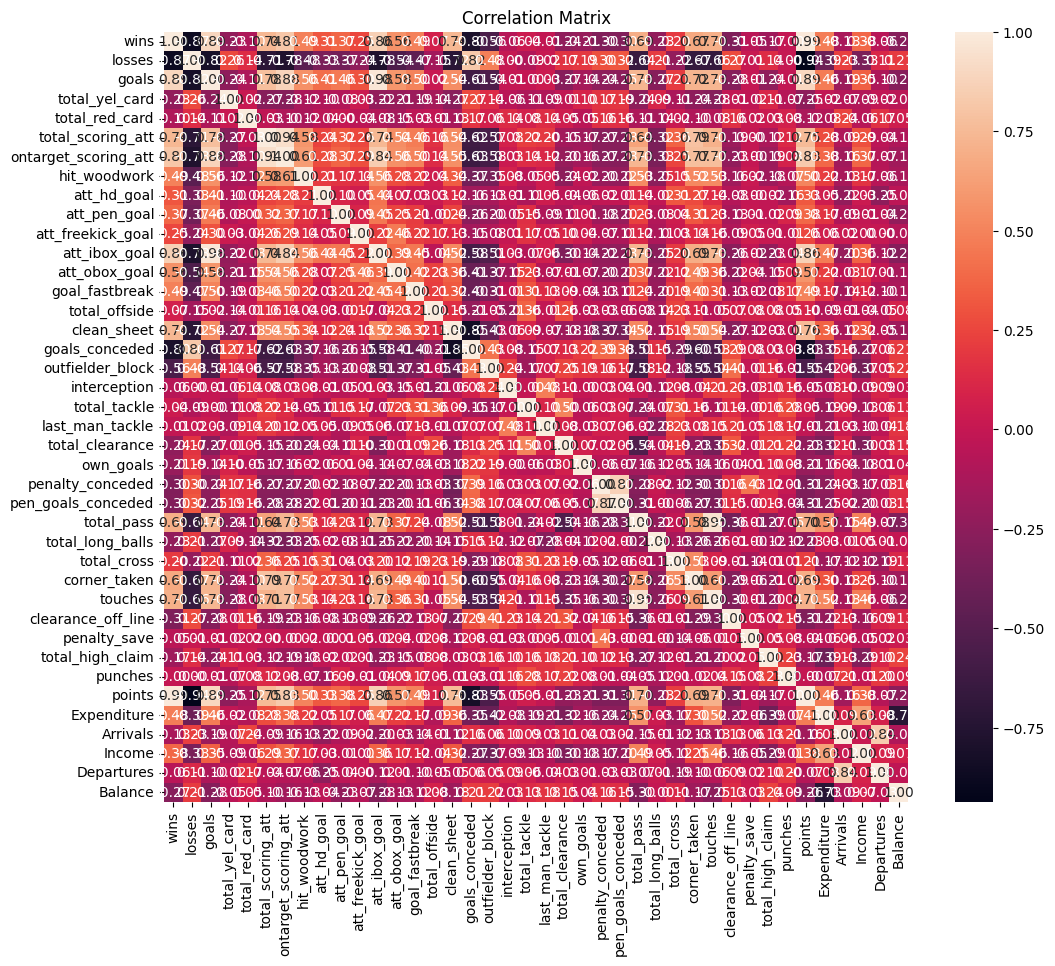

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../Group_project/results_final_normalized.csv')

# Generate the correlation matrix
corr_matrix = df[predictor_vars].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Step 4: Check for Multicollinearity Using Variance Inflation Factor (VIF)

Objective:

- The objective of this step is to identify and quantify multicollinearity among the predictor variables within the dataset. Multicollinearity can severely impact the interpretability and the stability of the coefficients estimated by the linear regression model. The Variance Inflation Factor (VIF) is used as a diagnostic measure to detect the presence of multicollinearity.

Understanding VIF:

- VIF provides an index that measures how much the variance of an estimated regression coefficient is increased because of collinearity.
VIF values start at 1 and have no upper limit. A value of 1 indicates no correlation between a given predictor and any other.
As a rule of thumb, a VIF value greater than 5 or 10 indicates a problematic amount of multicollinearity that needs to be addressed.

Calculating VIF:

- Data Preparation: A version of the dataset with normalized predictors is loaded to ensure that the VIF calculation is not unduly influenced by differences in the scale of the variables.

VIF Calculation: 

- For each predictor variable, the VIF is calculated, indicating how much the variance of the coefficient is inflated due to linear dependencies with other predictors.

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('../Group_project/results_final_normalized.csv')

# Calculate VIF for each predictor
VIFs = pd.DataFrame()
VIFs['Variable'] = predictor_vars
VIFs['VIF'] = [variance_inflation_factor(df[predictor_vars].values, i) for i in range(len(predictor_vars))]

# Display the VIFs
print(VIFs)


                Variable           VIF
0                   wins           inf
1                 losses           inf
2                  goals  1.122715e+04
3         total_yel_card  1.449590e+00
4         total_red_card  1.281596e+00
5      total_scoring_att  1.418714e+01
6   ontarget_scoring_att  2.187519e+01
7           hit_woodwork  1.946263e+00
8            att_hd_goal  1.970700e+00
9           att_pen_goal  1.793506e+00
10     att_freekick_goal  1.592686e+00
11         att_ibox_goal  8.779142e+03
12         att_obox_goal  5.897853e+02
13        goal_fastbreak  1.906194e+00
14         total_offside  1.539642e+00
15           clean_sheet  4.814342e+00
16        goals_conceded  9.235435e+00
17      outfielder_block  2.654459e+00
18          interception  2.709592e+00
19          total_tackle  2.553806e+00
20       last_man_tackle  2.031056e+00
21       total_clearance  3.988308e+00
22             own_goals  1.270040e+00
23      penalty_conceded  2.298548e+01
24    pen_goals_conceded 

C:\Users\sa6ko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\sa6ko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\sa6ko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# Step 5: Reduce Multicollinearity and Refine Dataset

Objective:
- To iteratively remove variables from the dataset that exhibit high multicollinearity, as indicated by their VIF values exceeding a specified threshold. This process aims to improve the predictive model's performance and interpretability by retaining only those variables that provide unique, non-redundant information.

Approach:
- Calculate Initial VIFs: Compute the VIF for each variable in the dataset to identify existing multicollinearity issues.

Iterative Removal: 
- Systematically remove the variable with the highest VIF value above a defined threshold (7.5 in this case), recalculating VIFs after each removal to continuously assess multicollinearity until all variables have VIF values below the threshold.

Finalize Dataset: 
- Once the multicollinearity reduction process is complete, the final set of variables is prepared for further analysis or modeling.

In [12]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('../Group_project/results_final_normalized.csv')

# Function to calculate VIF for each feature
def calculate_vifs(input_data, threshold=7.5):
    # Initializing DataFrame to store VIF scores
    vif_data = pd.DataFrame()
    vif_data['Variable'] = input_data.columns
    vif_data['VIF'] = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]

    # Loop to iteratively remove features with the highest VIF
    while vif_data['VIF'].max() > threshold:
        # Find the feature with the maximum VIF
        remove = vif_data.sort_values('VIF', ascending=False).iloc[0]
        # Drop the feature from the dataset
        input_data = input_data.drop(remove['Variable'], axis=1)
        # Recalculate VIF scores
        vif_data = pd.DataFrame()
        vif_data['Variable'] = input_data.columns
        vif_data['VIF'] = [variance_inflation_factor(input_data.values, i) for i in range(input_data.shape[1])]
        print(f"Dropping '{remove['Variable']}' with VIF: {remove['VIF']}")

    return vif_data

# Calculate VIF for all features and remove those with VIF above 7.5
final_vifs = calculate_vifs(df[predictor_vars])

# The remaining variables
print(final_vifs)

# Select only the variables with VIF below the threshold from the original dataframe
final_df = df[final_vifs['Variable']]

# Include the target variable and any other variables you might need that were not part of the VIF calculation
final_df['fs_result'] = df['fs_result']
# Add other columns if necessary, e.g., 'season', 'team', etc.
final_df['season'] = df['season']
final_df['team'] = df['team']

# Save the final_df to a new CSV file
final_df.to_csv('../Group_project/results_final_reduced.csv', index=False)


C:\Users\sa6ko\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Dropping 'wins' with VIF: inf
Dropping 'Expenditure' with VIF: 303736437.1543352
Dropping 'goals' with VIF: 11225.522151433473
Dropping 'total_pass' with VIF: 52.20668443898941
Dropping 'points' with VIF: 25.702375127674213
Dropping 'penalty_conceded' with VIF: 22.4263641160926
Dropping 'ontarget_scoring_att' with VIF: 20.658912030454633
Dropping 'goals_conceded' with VIF: 7.596709630957721
              Variable       VIF
0               losses  5.344425
1       total_yel_card  1.369396
2       total_red_card  1.226752
3    total_scoring_att  5.558910
4         hit_woodwork  1.859772
5          att_hd_goal  1.851690
6         att_pen_goal  1.681872
7    att_freekick_goal  1.506888
8        att_ibox_goal  7.267105
9        att_obox_goal  2.389521
10      goal_fastbreak  1.839365
11       total_offside  1.500552
12         clean_sheet  2.671379
13    outfielder_block  2.465557
14        interception  1.926126
15        total_tackle  2.376039
16     last_man_tackle  1.760851
17     total

C:\Users\sa6ko\AppData\Local\Temp\ipykernel_24228\828871130.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['fs_result'] = df['fs_result']
C:\Users\sa6ko\AppData\Local\Temp\ipykernel_24228\828871130.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['season'] = df['season']
C:\Users\sa6ko\AppData\Local\Temp\ipykernel_24228\828871130.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

# Step 6: Prepare Refined Non-Normalized Dataset

Objective:
- To create a refined dataset that includes only those variables identified as having acceptable levels of multicollinearity from the previous step, excluding highly correlated predictors to improve model accuracy and interpretability. This dataset will serve as the foundation for further linear regression analysis.

Process Overview:
- Load Original Dataset: Begin with the original, non-normalized dataset to ensure that the adjustments for multicollinearity are applied to data in its initial scale and distribution.

Identify Reduced Variables: 
- Based on the multicollinearity analysis, a subset of variables has been identified that do not exhibit problematic levels of correlation, ensuring that each provides unique predictive value.

Dataset Refinement: 
- Extract only the identified variables along with the target variable and any necessary identifiers (e.g., 'season', 'team') to create a focused dataset for analysis.

Save Refined Dataset: 
- Store this newly created dataset for easy access and reproducibility in subsequent analysis steps.

In [13]:
import pandas as pd

# Load the original non-normalized dataset
df_original = pd.read_csv('../Group_project/results_final.csv')

# List of reduced variables retained after the multicollinearity check
reduced_vars = [
    'losses', 'total_yel_card', 'total_red_card', 'total_scoring_att',
    'hit_woodwork', 'att_hd_goal', 'att_pen_goal', 'att_freekick_goal',
    'att_ibox_goal', 'att_obox_goal', 'goal_fastbreak', 'total_offside',
    'clean_sheet', 'outfielder_block', 'interception', 'total_tackle',
    'last_man_tackle', 'total_clearance', 'own_goals', 'pen_goals_conceded',
    'total_long_balls', 'total_cross', 'corner_taken', 'touches',
    'clearance_off_line', 'penalty_save', 'total_high_claim', 'punches',
    'Arrivals', 'Income', 'Departures', 'Balance'
]

# Ensure to include your target variable and any identifiers
final_columns = reduced_vars + ['fs_result', 'season', 'team']

# Select only these variables from the original dataset
df_reduced_non_normalized = df_original[final_columns]

# Save the refined non-normalized dataset
df_reduced_non_normalized.to_csv('../Group_project/results_final_reduced_non_normalized.csv', index=False)


# Step 7: Perform Linear Regression with the Refined Dataset

Objective:
- To fit and evaluate a linear regression model using the dataset refined in Step 5, with the aim of assessing improvements in model performance and interpretability due to reduced multicollinearity among predictors.

Preliminary Setup:
- Dataset Preparation: Load the dataset containing the reduced set of variables after multicollinearity checks.
- Variable Selection: Identify the predictors and the target variable within the refined dataset.

Linear Regression Analysis:
- Model Fitting: Utilize the LinearRegression model from sklearn to fit the data, now with reduced multicollinearity.

Model Evaluation: 
- Evaluate the model using appropriate metrics (e.g., R-squared, MSE, MAE) to understand its performance. Compare these results with those obtained before multicollinearity reduction to assess improvements.

R-squared: 0.574238496022635
MSE: 111.55964519029038
MAE: 8.476785791137026


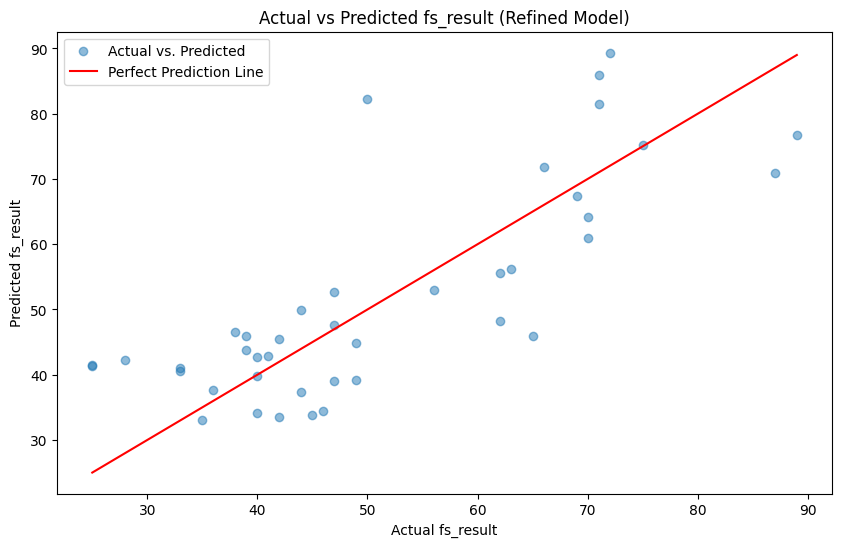

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Load the refined dataset
df_refined = pd.read_csv('../Group_project/results_final_reduced_non_normalized.csv')

# Select predictors and the target variable
predictor_vars_refined = df_refined.columns.difference(['fs_result', 'season', 'team'])
X_refined = df_refined[predictor_vars_refined]
y_refined = df_refined['fs_result']

# Split the data into training and testing sets
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(X_refined, y_refined, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model_refined = LinearRegression()
model_refined.fit(X_train_refined, y_train_refined)

# Make predictions on the test set
predictions_refined = model_refined.predict(X_test_refined)

# Evaluate the model
print("R-squared:", r2_score(y_test_refined, predictions_refined))
print("MSE:", mean_squared_error(y_test_refined, predictions_refined))
print("MAE:", mean_absolute_error(y_test_refined, predictions_refined))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_refined, predictions_refined, alpha=0.5, label='Actual vs. Predicted')
plt.plot(np.linspace(min(y_test_refined), max(y_test_refined), 100), np.linspace(min(y_test_refined), max(y_test_refined), 100), color='red', label='Perfect Prediction Line')  # Line for perfect predictions
plt.xlabel('Actual fs_result')
plt.ylabel('Predicted fs_result')
plt.title('Actual vs Predicted fs_result (Refined Model)')

# Add the legend
plt.legend()

plt.show()